In [1]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.5-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached grpcio-1.78.0-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached ml_dtypes-0.5.4-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.5 which is incompatible.


In [2]:

import pandas as pd

df = pd.read_csv(r"C:\Users\Admin\Desktop\New folder\eth-rainfall-subnat-full.csv")
df.head()


,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,1981-01-01,1,900532,ET14,20.0,1.4,3.641667,NaN,NaN,NaN,NaN,74.059790,NaN,NaN,final
1,1981-01-11,1,900532,ET14,20.0,1.2,4.305000,NaN,NaN,NaN,NaN,66.630844,NaN,NaN,final
2,1981-01-21,1,900532,ET14,20.0,1.3,5.723333,3.9,13.670000,NaN,NaN,58.750390,47.67006,NaN,final
3,1981-02-01,1,900532,ET14,20.0,2.1,11.851666,4.6,21.880000,NaN,NaN,42.132330,35.71429,NaN,final
4,1981-02-11,1,900532,ET14,20.0,26.5,11.213333,29.9,28.788334,NaN,NaN,194.284550,103.29009,NaN,final


In [3]:
df.tail()

,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
147779,2025-12-21,2,1007537,ET0706,147.0,39.469387,9.378458,68.823130,27.174830,196.496610,188.765530,309.277860,229.44374,103.989914,final
147780,2026-01-01,2,1007537,ET0706,147.0,8.408163,8.635147,72.238100,24.898867,157.891140,157.553280,98.335304,258.33118,100.207840,prelim
147781,2026-01-11,2,1007537,ET0706,147.0,4.761905,11.782766,52.639454,29.795012,108.462580,130.167340,58.166240,165.65434,83.942300,prelim
147782,2026-01-21,2,1007537,ET0706,147.0,9.809524,11.588208,22.979591,32.006123,105.809520,102.638320,89.277420,75.60800,102.946160,prelim
147783,2026-02-01,2,1007537,ET0706,147.0,11.136054,13.274376,25.707481,36.645350,111.136055,96.799095,88.298805,73.73568,114.083590,forecast


In [4]:
df.isnull().sum()


date           0
adm_level      0
adm_id         0
PCODE          0
n_pixels       0
rfh            0
rfh_avg        0
r1h          182
r1h_avg      182
r3h          728
r3h_avg      728
rfq            0
r1q          182
r3q          728
version        0
dtype: int64

In [5]:
df= df.dropna().reset_index(drop=True)


In [8]:
df.isnull().sum()


date         0
adm_level    0
adm_id       0
PCODE        0
n_pixels     0
rfh          0
rfh_avg      0
r1h          0
r1h_avg      0
r3h          0
r3h_avg      0
rfq          0
r1q          0
r3q          0
version      0
dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['date'])



In [11]:
df.dtypes


date         datetime64[ns]
adm_level             int64
adm_id                int64
PCODE                object
n_pixels            float64
rfh                 float64
rfh_avg             float64
r1h                 float64
r1h_avg             float64
r3h                 float64
r3h_avg             float64
rfq                 float64
r1q                 float64
r3q                 float64
version              object
dtype: object

In [12]:
df = df.drop(columns=['PCODE', 'version'])



In [13]:
df.dtypes

date         datetime64[ns]
adm_level             int64
adm_id                int64
n_pixels            float64
rfh                 float64
rfh_avg             float64
r1h                 float64
r1h_avg             float64
r3h                 float64
r3h_avg             float64
rfq                 float64
r1q                 float64
r3q                 float64
dtype: object

In [14]:
df = df.sort_values(['adm_id', 'date']).reset_index(drop=True)


In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dekad'] = df['date'].dt.day.map({1:1, 11:2, 21:3})


In [16]:
df['rfh_lag1'] = df.groupby('adm_id')['rfh'].shift(1)
df['rfh_lag3'] = df.groupby('adm_id')['rfh'].shift(3)


In [17]:
df = df.dropna()


In [18]:
df.duplicated().sum()


0

In [19]:
# # Target is current rainfall
# y = df['rfh']

# # Features (X) - we exclude 'date' and the target itself
# features = ['rfh_avg', 'r1h_avg', 'r3h_avg', 'month', 'dekad', 'rfh_lag1', 'rfh_lag3', 'adm_id']
# X = df[features]

In [20]:
# from sklearn.model_selection import train_test_split

# # Take the first 80% of rows for training, last 20% for testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# print(f"Training on {len(X_train)} rows")

In [21]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

# # 1. Initialize and Train
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # 2. Predict
# preds = model.predict(X_test)

# # 3. Check Performance
# print(f"MAE (Error): {mean_absolute_error(y_test, preds):.2f} mm")
# print(f"R2 Score: {r2_score(y_test, preds):.2f}")

In [22]:
from sklearn.preprocessing import MinMaxScaler

# 1. Select features
features = ['rfh_avg', 'r1h_avg', 'r3h_avg', 'month', 'dekad', 'rfh_lag1', 'rfh_lag3']
X = df[features].values
y = df['rfh'].values.reshape(-1, 1)

# 2. Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 3. Split data (80% Train, 20% Test) - No Shuffling
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [23]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(f"Input shape: {X_train.shape}") # Should be (Samples, 1, 7)

Input shape: (117426, 1, 7)


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2), # Prevents overfitting
    LSTM(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1) # Final output: Rainfall amount
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,393 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# We use validation_split to see how the model performs on unseen data during training
history = model.fit(
    X_train, y_train, 
    epochs=50,           # Number of times the AI looks at the whole dataset
    batch_size=32,       # Number of rows processed before updating weights
    validation_split=0.1, # Uses 10% of training data for a quick check
    verbose=1            # Shows progress for each epoch
)

Epoch 1/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0050 - mae: 0.0466 - val_loss: 0.0037 - val_mae: 0.0393
Epoch 2/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0045 - mae: 0.0442 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 3/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0045 - mae: 0.0439 - val_loss: 0.0036 - val_mae: 0.0387
Epoch 4/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0045 - mae: 0.0438 - val_loss: 0.0037 - val_mae: 0.0389
Epoch 5/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0044 - mae: 0.0437 - val_loss: 0.0036 - val_mae: 0.0392
Epoch 6/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0044 - mae: 0.0436 - val_loss: 0.0036 - val_mae: 0.0383
Epoch 7/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0044 - mae: 0.0435 - val_loss: 0.0036 - val_mae: 0.0390
Epoch 8/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0044 - mae: 0.0435 - val_loss: 0.0036 - val_mae: 0.0385
Epoch 9/50
3303/3303 ━━━━━━━━━━━

In [26]:
# 1. Predict on the test data
y_pred_scaled = model.predict(X_test)

# 2. Inverse scale to get actual mm values
# (Assuming your scaler was named 'scaler_y')
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

print("Predictions completed.")

918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predictions completed.


In [27]:
from sklearn.metrics import r2_score, mean_absolute_error

mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print(f"--- Results ---")
print(f"Mean Absolute Error: {mae:.2f} mm") 
print(f"R2 Score (Accuracy): {r2:.2f}") # Target: > 0.60

--- Results ---
Mean Absolute Error: 7.97 mm
R2 Score (Accuracy): 0.78


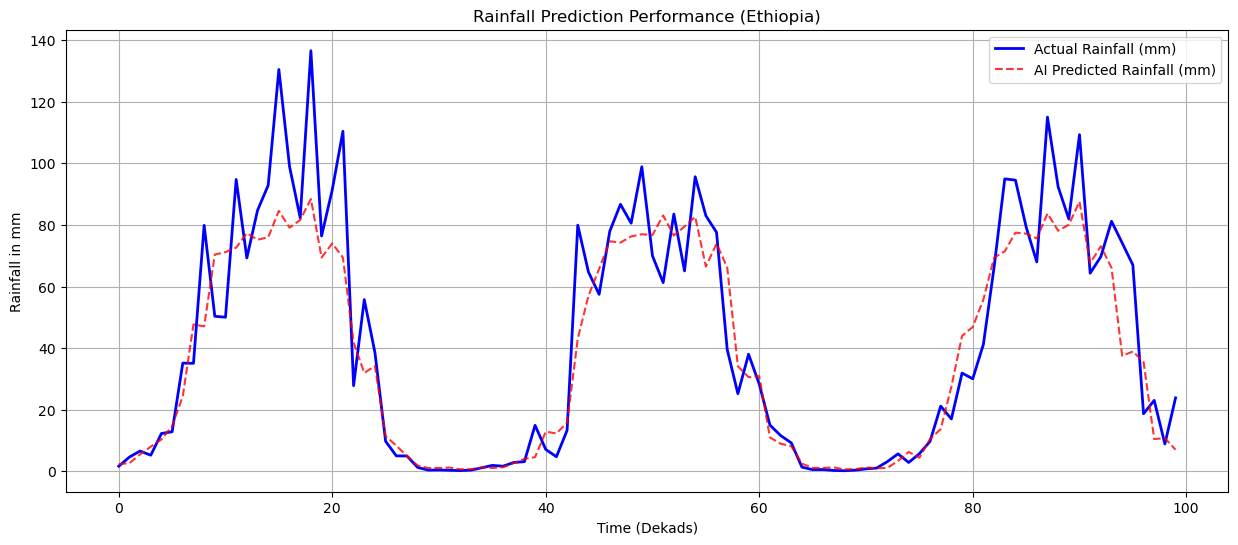

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_actual[:100], label='Actual Rainfall (mm)', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='AI Predicted Rainfall (mm)', color='red', linestyle='--', alpha=0.8)
plt.title('Rainfall Prediction Performance (Ethiopia)')
plt.xlabel('Time (Dekads)')
plt.ylabel('Rainfall in mm')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
import joblib

# 1. Save the AI Model
model.save('rainfall_model.keras')

# 2. Save the Scalers (needed to process web inputs)
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

print("Success! Download these 3 files for your web app:")
print("1. rainfall_model.keras")
print("2. scaler_X.pkl")
print("3. scaler_y.pkl")

Success! Download these 3 files for your web app:
1. rainfall_model.keras
2. scaler_X.pkl
3. scaler_y.pkl
